# [goulib](../notebook.ipynb).table
"mini pandas.DataFrame" Table class with Excel + CSV I/O, easy access to columns, HTML output, and much more.

In [9]:
from goulib.notebook import *
from goulib.table import *

In [10]:
small=Table(Table([[1,2,3],(4,5)])) #tables can be constructed from any tabular data
small

<class 'goulib.table.Table'>(len=2,titles=[],data=[[1, 2, 3], [4, 5]])

<class 'goulib.table.Table'>(len=2,titles=['complex', 'content'],data=[[<class 'goulib.table.Table'>(len=2,titles=[],data=[[1, 2, 3], [4, 5]]), '$\\\\LaTeX : \\sqrt{\\left(a+b\\right)\\left(a-b\\right)}$'], [Image(mode=RGB shape=(128, 128, 3) type=float64), Image(mode=RGB shape=(128, 128, 3) type=float64)]])
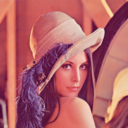
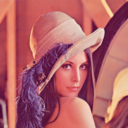

In [11]:
#Table cells can contain other tables, LaTeX expressions, Images... and more (soon...)
from goulib.image import Image
lena=Image('../../tests/data/lena.png').resize((128,128))
Table([[small,r'$\\LaTeX : \sqrt{\left(a+b\right)\left(a-b\right)}$'],[lena,lena]],titles=['complex','content'])

In [12]:
# Tables can be read from .csv, html, JSON and Excel files (requires xlrd http://www.python-excel.org/)
t=Table('../../tests/data/test.xls') 

In [13]:
print(t.titles) #Tables have optional column headers

['OrderDate', 'Région', 'Rep', 'Item', 'Unités', 'Cost', 'Total']


In [14]:
t.setcol('Total',None)
Table(t[:5],titles=t.titles) #indexing lines, construction and default HTML representation
#notice the Order Dates are messy because of Excel representaion of dates

OrderDate,Région,Rep,Item,Unités,Cost,Total
41061,East,Jones,Pencil,95,1.99,
1/23/2012,Central,Kivell,Binder,50,19.99,
41154,Central,Jardine,Pencil,36,4.99,
2/26/2012,Central,Gill,Pen,27,19.99,
3/15/2012,West,Sorvino,Pencil,56,2.99,


In [15]:
t[2,5],t[2,'Cost'] # cells can be accessed by row,col index or title

(4.99, 4.99)

In [16]:
print(t[:5,'Cost']) # indexing supports slices too

[1.99, 19.99, 4.99, 19.99, 2.99]


In [17]:
# handle the mess in Excel Cell types ...
t.to_date('OrderDate',fmt=['%m/%d/%Y','Excel']) #converts column to date using several possible formats...
t.applyf('Cost',float) # apply a function to a column. Here force the column to contain floats

True

In [18]:
# math between columns is still a bit tedious...
from goulib.math2 import vecmul
t.setcol('Total',vecmul(t.col('Cost'),t.col('Unités')))

In [19]:
#it's easy to make a "total" line from columns
#with a list of reduce-like functions applied to each column
from goulib.stats import avg
from goulib.itertools2 import count_unique
t.total([max,count_unique,count_unique,count_unique,sum,avg,sum])
t.footer #result is stored in a separated footer field

[datetime.date(2013, 12, 21), 3, 11, 5, 2121, 20.308604651162796, 19627.88]

In [20]:
h(t.html(start=5,stop=10)) # a way to shorten long tables

OrderDate,Région,Rep,Item,Unités,Cost,Total
...,...,...,...,...,...,...
2012-01-04,East,Jones,Binder,60,4.99,299.40
2012-04-18,Central,Andrews,Pencil,75,1.99,149.25
2012-05-05,Central,Jardine,Pencil,90,4.99,449.10
2012-05-22,West,Thompson,Pencil,32,1.99,63.68
2012-08-06,East,Jones,Binder,60,8.99,539.40
...,...,...,...,...,...,...
2013-12-21,3,11,5,2121,20.31,19627.88


In [21]:
t.sort('Total',reverse=True) # Tables can be sorted by column easily
h(t.html(stop=5)) # show only the 5 lines with highest total

OrderDate,Région,Rep,Item,Unités,Cost,Total
2013-04-12,Central,Jardine,Binder,94,19.99,1879.06
2012-07-29,East,Parent,Binder,81,19.99,1619.19
2013-01-02,Central,Smith,Binder,87,15.00,1305.00
2012-12-29,East,Parent,Pen Set,74,15.99,1183.26
2013-10-14,West,Thompson,Binder,57,19.99,1139.43
...,...,...,...,...,...,...
2013-12-21,3,11,5,2121,20.31,19627.88


In [22]:
region=t.groupby(u'Région') # dictionary of subtables grouped by a column. notice Unicode support
region['East'] # isn't it nice ?

OrderDate,Rep,Item,Unités,Cost,Total
2012-07-29,Parent,Binder,81,19.99,1619.19
2012-12-29,Parent,Pen Set,74,15.99,1183.26
2012-10-22,Jones,Pen,64,8.99,575.36
2012-08-06,Jones,Binder,60,8.99,539.40
2013-04-27,Howard,Pen,96,4.99,479.04
2013-04-07,Jones,Pen Set,62,4.99,309.38
2012-08-11,Parent,Pen,15,19.99,299.85
2012-01-04,Jones,Binder,60,4.99,299.40
2012-09-18,Jones,Pen Set,16,15.99,255.84
2012-06-01,Jones,Pencil,95,1.99,189.05


In [23]:
#a row can be extracted as a dict where column titles are keys
t.rowasdict(1)

OrderedDict([('OrderDate', datetime.date(2013, 1, 2)),
             ('Région', 'Central'),
             ('Rep', 'Smith'),
             ('Item', 'Binder'),
             ('Unités', 87),
             ('Cost', 15.0),
             ('Total', 1305.0)])

In [24]:
t.json()[:250]+'...' #rowasdict is handy to build json representation

'[{"OrderDate": "2013-04-12", "R\\u00e9gion": "Central", "Rep": "Jardine", "Item": "Binder", "Unit\\u00e9s": 94, "Cost": 19.99, "Total": 1879.06}, {"OrderDate": "2013-01-02", "R\\u00e9gion": "Central", "Rep": "Smith", "Item": "Binder", "Unit\\u00e9s": 87,...'

In [25]:
from goulib.math2 import *
from goulib.itertools2 import *
res=Table(t) #copy
s=len(res)
for i in range(s-1):
    line=res[i]
    d=[hamming(line,res[j]) for j in range(i+1,s)]
    j=index_min(d)[0]+i
    res[i+1],res[j]=res[j],res[i+1] #swap
res

OrderDate,Région,Rep,Item,Unités,Cost,Total
2013-04-12,Central,Jardine,Binder,94,19.99,1879.06
2013-07-08,Central,Kivell,Pen Set,42,23.95,1005.90
2012-01-23,Central,Kivell,Binder,50,19.99,999.50
2013-05-31,Central,Gill,Binder,80,8.99,719.20
2012-02-26,Central,Gill,Pen,27,19.99,539.73
2012-06-25,Central,Morgan,Pencil,90,4.99,449.10
2012-11-25,Central,Kivell,Pen Set,96,4.99,479.04
2013-06-17,Central,Kivell,Desk,5,125.00,625.00
2012-01-09,Central,Smith,Desk,2,125.00,250.00
2012-05-10,Central,Morgan,Binder,28,8.99,251.72


In [26]:
hamming(t[1],t[2])

6

<class 'goulib.table.Table'>(len=2,titles=['complex', 'content'],data=[[<class 'goulib.table.Table'>(len=2,titles=[],data=[[1, 2, 3], [4, 5]]), '$\\\\LaTeX : \\sqrt{\\left(a+b\\right)\\left(a-b\\right)}$'], [Image(mode=RGB shape=(128, 128, 3) type=float64), Image(mode=RGB shape=(128, 128, 3) type=float64)]])
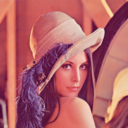
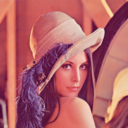

In [27]:
Table([[small,r'$\\LaTeX : \sqrt{\left(a+b\right)\left(a-b\right)}$'],[lena,lena]],titles=['complex','content'])